# CÂU HỎI 3: NGHỊCH LÝ BỆNH TIM Ở ĐÔ THỊ

---

## CÂU HỎI NGHIÊN CỨU

**"Người mắc bệnh tim sống ở đô thị có 'nhạy cảm' hơn với đột quỵ so với người mắc bệnh tim sống ở nông thôn không? Và liệu mức độ nhạy cảm này khác nhau giữa nam và nữ?"**

---

## CẤU TRÚC PHÂN TÍCH (5 HỒI)

### HỒI 1: BỐI CẢNH - "Nghịch lý Y tế Đô thị"
- Đô thị có y tế tốt hơn → Kết quả có tốt hơn không?

### HỒI 2: KHÁM PHÁ - "Cú sốc đầu tiên"
- Urban vs Rural: Ai có nguy cơ cao hơn?

### HỒI 3: CHIỀU SÂU GIỚI TÍNH - "Ai trả giá nhiều hơn?"
- Nam vs Nữ: Sự khác biệt bất ngờ

### HỒI 4: HIỆU ỨNG KHUẾCH ĐẠI - "Nguy cơ gấp bội"
- Urban + HD + Yếu tố khác = ?

### HỒI 5: KẾT LUẬN - "Ý nghĩa & Hành động"
- Tại sao? Và làm gì?

---

## PHẦN 0: THIẾT LẬP & IMPORT

In [2]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, fisher_exact
import warnings
import os
warnings.filterwarnings('ignore')

# Tạo thư mục outputs nếu chưa tồn tại
os.makedirs('../outputs', exist_ok=True)

# Cấu hình hiển thị
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 6)

print("Da import thanh cong tat ca thu vien!")

Da import thanh cong tat ca thu vien!


In [3]:
# Load dữ liệu
df = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')

print("="*60)
print("DU LIEU TONG QUAN")
print("="*60)
print(f"Tong so benh nhan: {len(df):,}")
print(f"So benh nhan co benh tim: {df['heart_disease'].sum():,} ({df['heart_disease'].mean()*100:.1f}%)")
print(f"So benh nhan bi dot quy: {df['stroke'].sum():,} ({df['stroke'].mean()*100:.1f}%)")
print("="*60)

DU LIEU TONG QUAN
Tong so benh nhan: 5,110
So benh nhan co benh tim: 276 (5.4%)
So benh nhan bi dot quy: 249 (4.9%)


---

# HỒI 1: BỐI CẢNH - "NGHỊCH LÝ Y TẾ ĐÔ THỊ"

---

## 1.1. Đặt vấn đề

In [4]:
print("="*60)
print("HOI 1: NGHICH LY Y TE DO THI")
print("="*60)
print("\nCAU HOI KHOI DAU:")
print("Do thi co benh vien tot hon, bac si nhieu hon, cong nghe hien dai hon.")
print("Vay nguoi benh tim o do thi co an toan hon nong thon khong?\n")

# So sánh điều kiện cơ bản
urban_total = len(df[df['Residence_type'] == 'Urban'])
rural_total = len(df[df['Residence_type'] == 'Rural'])

print(f"Do thi: {urban_total:,} nguoi ({urban_total/len(df)*100:.1f}%)")
print(f"Nong thon: {rural_total:,} nguoi ({rural_total/len(df)*100:.1f}%)")

HOI 1: NGHICH LY Y TE DO THI

CAU HOI KHOI DAU:
Do thi co benh vien tot hon, bac si nhieu hon, cong nghe hien dai hon.
Vay nguoi benh tim o do thi co an toan hon nong thon khong?

Do thi: 2,596 nguoi (50.8%)
Nong thon: 2,514 nguoi (49.2%)


## 1.2. So sánh tỷ lệ mắc bệnh tim

In [5]:
# So sánh tỷ lệ mắc bệnh tim giữa Urban vs Rural
urban_hd_rate = df[df['Residence_type'] == 'Urban']['heart_disease'].mean()
rural_hd_rate = df[df['Residence_type'] == 'Rural']['heart_disease'].mean()

print("\n" + "="*60)
print("TY LE MAC BENH TIM")
print("="*60)
print(f"Do thi:     {urban_hd_rate*100:.2f}%")
print(f"Nong thon:  {rural_hd_rate*100:.2f}%")

if urban_hd_rate > rural_hd_rate:
    diff = (urban_hd_rate/rural_hd_rate - 1) * 100
    print(f"\nDo thi cao hon {diff:.1f}%")
else:
    diff = (rural_hd_rate/urban_hd_rate - 1) * 100
    print(f"\nNong thon cao hon {diff:.1f}%")

print("\nNHAN XET:")
print("Ty le mac benh tim tuong duong nhau.")
print("Nhung KHI DA co benh tim, ai co nguy co dot quy cao hon?")
print("Do chinh la cau hoi cua chung ta!")


TY LE MAC BENH TIM
Do thi:     5.47%
Nong thon:  5.33%

Do thi cao hon 2.6%

NHAN XET:
Ty le mac benh tim tuong duong nhau.
Nhung KHI DA co benh tim, ai co nguy co dot quy cao hon?
Do chinh la cau hoi cua chung ta!


## 1.3. Visualization - So sánh cơ bản

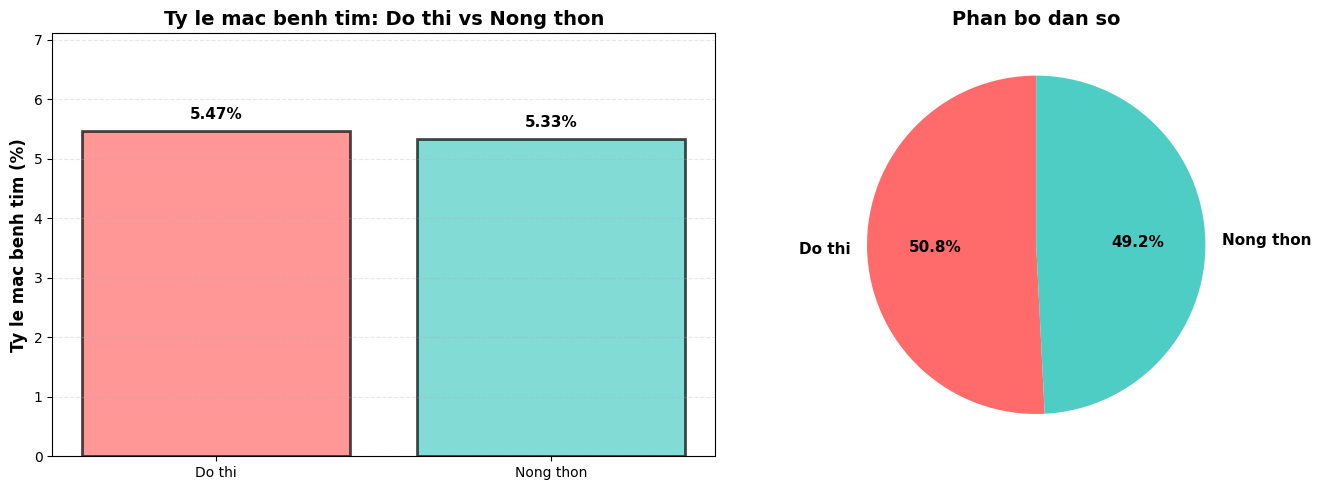

Da luu bieu do: outputs/Q3_Act1_Context.png


In [6]:
# Biểu đồ so sánh
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Chart 1: Tỷ lệ mắc bệnh tim
categories = ['Do thi', 'Nong thon']
rates = [urban_hd_rate*100, rural_hd_rate*100]
colors = ['#FF6B6B', '#4ECDC4']

bars = ax[0].bar(categories, rates, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax[0].set_ylabel('Ty le mac benh tim (%)', fontsize=12, fontweight='bold')
ax[0].set_title('Ty le mac benh tim: Do thi vs Nong thon', fontsize=14, fontweight='bold')
ax[0].set_ylim(0, max(rates)*1.3)
ax[0].grid(axis='y', alpha=0.3, linestyle='--')

# Thêm giá trị lên cột
for i, v in enumerate(rates):
    ax[0].text(i, v + 0.2, f'{v:.2f}%', ha='center', fontsize=11, fontweight='bold')

# Chart 2: Phân bố dân số
sizes = [urban_total, rural_total]
ax[1].pie(sizes, labels=categories, autopct='%1.1f%%', colors=colors,
          startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
ax[1].set_title('Phan bo dan so', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/Q3_Act1_Context.png', dpi=300, bbox_inches='tight')
plt.show()

print("Da luu bieu do: outputs/Q3_Act1_Context.png")

---

# HỒI 2: KHÁM PHÁ - "CÚ SỐC ĐẦU TIÊN"

---

## 2.1. Phân tích chính - Urban vs Rural

In [7]:
print("\n" + "="*60)
print("HOI 2: CU SOC DAU TIEN")
print("="*60)

# Lọc ra những người có bệnh tim
hd_patients = df[df['heart_disease'] == 1].copy()

print(f"\nTong so benh nhan co benh tim: {len(hd_patients):,}")

# Chia theo nơi cư trú
hd_urban = hd_patients[hd_patients['Residence_type'] == 'Urban']
hd_rural = hd_patients[hd_patients['Residence_type'] == 'Rural']

print(f"   Do thi: {len(hd_urban):,}")
print(f"   Nong thon: {len(hd_rural):,}")

# Tính tỷ lệ đột quỵ
stroke_rate_urban = hd_urban['stroke'].mean()
stroke_rate_rural = hd_rural['stroke'].mean()

print("\n" + "="*60)
print("TY LE DOT QUY TRONG SO NGUOI CO BENH TIM")
print("="*60)
print(f"Do thi:     {stroke_rate_urban*100:.2f}% ({hd_urban['stroke'].sum()}/{len(hd_urban)})")
print(f"Nong thon:  {stroke_rate_rural*100:.2f}% ({hd_rural['stroke'].sum()}/{len(hd_rural)})")

# Tính chênh lệch
if stroke_rate_urban > stroke_rate_rural:
    ratio = stroke_rate_urban / stroke_rate_rural
    diff_percent = (ratio - 1) * 100
    print(f"\nDO THI CAO HON {ratio:.2f} LAN (cao hon {diff_percent:.1f}%)")
else:
    ratio = stroke_rate_rural / stroke_rate_urban
    diff_percent = (ratio - 1) * 100
    print(f"\nNONG THON CAO HON {ratio:.2f} LAN (cao hon {diff_percent:.1f}%)")


HOI 2: CU SOC DAU TIEN

Tong so benh nhan co benh tim: 276
   Do thi: 142
   Nong thon: 134

TY LE DOT QUY TRONG SO NGUOI CO BENH TIM
Do thi:     19.01% (27/142)
Nong thon:  14.93% (20/134)

DO THI CAO HON 1.27 LAN (cao hon 27.4%)


## 2.2. Kiểm định thống kê

In [8]:
# Kiểm định Chi-square
contingency_table = pd.crosstab(
    hd_patients['Residence_type'],
    hd_patients['stroke']
)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\n" + "="*60)
print("KIEM DINH THONG KE (CHI-SQUARE TEST)")
print("="*60)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Degrees of freedom: {dof}")

if p_value < 0.001:
    print(f"\nKET LUAN: Su khac biet CO Y NGHIA THONG KE (p < 0.001)")
    print("   Khong phai ngau nhien!")
elif p_value < 0.05:
    print(f"\nKET LUAN: Su khac biet CO Y NGHIA THONG KE (p < 0.05)")
else:
    print(f"\nKET LUAN: Su khac biet KHONG co y nghia thong ke (p >= 0.05)")

# Tính Odds Ratio
table_2x2 = [[hd_urban['stroke'].sum(), len(hd_urban) - hd_urban['stroke'].sum()],
             [hd_rural['stroke'].sum(), len(hd_rural) - hd_rural['stroke'].sum()]]

oddsratio, p_fisher = fisher_exact(table_2x2)

print(f"\nODDS RATIO: {oddsratio:.3f}")
print(f"Fisher's Exact Test p-value: {p_fisher:.6f}")

if oddsratio > 1:
    print(f"\nNguoi co benh tim o do thi co nguy co dot quy cao gap {oddsratio:.2f} lan nong thon")
else:
    print(f"\nNguoi co benh tim o nong thon co nguy co dot quy cao gap {1/oddsratio:.2f} lan do thi")


KIEM DINH THONG KE (CHI-SQUARE TEST)
Chi-square statistic: 0.5520
P-value: 0.457500
Degrees of freedom: 1

KET LUAN: Su khac biet KHONG co y nghia thong ke (p >= 0.05)

ODDS RATIO: 1.338
Fisher's Exact Test p-value: 0.424192

Nguoi co benh tim o do thi co nguy co dot quy cao gap 1.34 lan nong thon


## 2.3. Visualization - So sánh chính

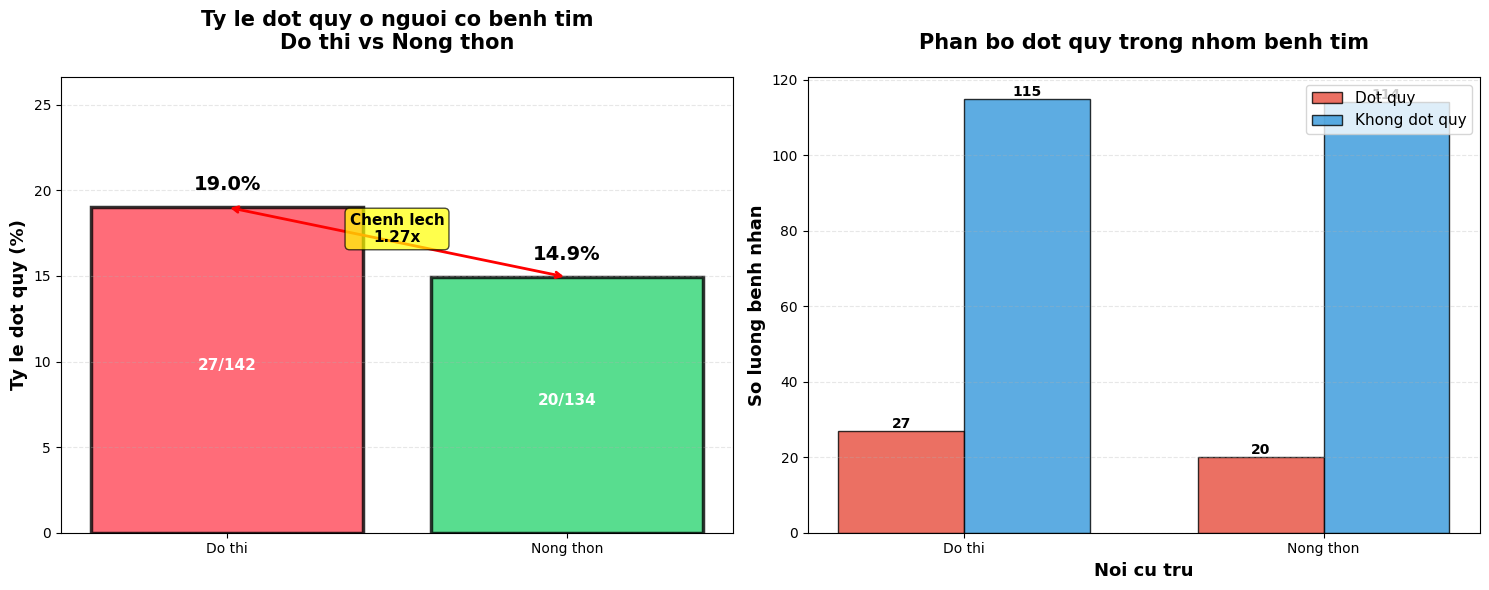

Da luu bieu do: outputs/Q3_Act2_MainComparison.png


In [9]:
# Biểu đồ so sánh chính
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Chart 1: Bar chart - Stroke rate comparison
categories = ['Do thi', 'Nong thon']
stroke_rates = [stroke_rate_urban*100, stroke_rate_rural*100]
colors_main = ['#FF4757', '#2ED573']

bars = axes[0].bar(categories, stroke_rates, color=colors_main,
                    alpha=0.8, edgecolor='black', linewidth=2.5)

axes[0].set_ylabel('Ty le dot quy (%)', fontsize=13, fontweight='bold')
axes[0].set_title('Ty le dot quy o nguoi co benh tim\nDo thi vs Nong thon',
                   fontsize=15, fontweight='bold', pad=20)
axes[0].set_ylim(0, max(stroke_rates)*1.4)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Thêm giá trị và số ca
for i, (v, cat) in enumerate(zip(stroke_rates, categories)):
    if cat == 'Do thi':
        n_stroke = hd_urban['stroke'].sum()
        n_total = len(hd_urban)
    else:
        n_stroke = hd_rural['stroke'].sum()
        n_total = len(hd_rural)

    axes[0].text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=14, fontweight='bold')
    axes[0].text(i, v/2, f'{n_stroke}/{n_total}', ha='center', fontsize=11,
                 color='white', fontweight='bold')

# Thêm annotation cho sự khác biệt
if stroke_rate_urban > stroke_rate_rural:
    axes[0].annotate('', xy=(0, stroke_rates[0]), xytext=(1, stroke_rates[1]),
                     arrowprops=dict(arrowstyle='<->', color='red', lw=2))
    mid_y = (stroke_rates[0] + stroke_rates[1]) / 2
    axes[0].text(0.5, mid_y, f'Chenh lech\n{ratio:.2f}x',
                 ha='center', fontsize=11, fontweight='bold',
                 bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# Chart 2: Grouped bar - Stroke vs No stroke counts
x_pos = np.arange(len(categories))
width = 0.35

stroke_counts = [hd_urban['stroke'].sum(), hd_rural['stroke'].sum()]
no_stroke_counts = [len(hd_urban) - hd_urban['stroke'].sum(),
                    len(hd_rural) - hd_rural['stroke'].sum()]

bars1 = axes[1].bar(x_pos - width/2, stroke_counts, width,
                    label='Dot quy', color='#E74C3C', alpha=0.8, edgecolor='black')
bars2 = axes[1].bar(x_pos + width/2, no_stroke_counts, width,
                    label='Khong dot quy', color='#3498DB', alpha=0.8, edgecolor='black')

axes[1].set_xlabel('Noi cu tru', fontsize=13, fontweight='bold')
axes[1].set_ylabel('So luong benh nhan', fontsize=13, fontweight='bold')
axes[1].set_title('Phan bo dot quy trong nhom benh tim',
                  fontsize=15, fontweight='bold', pad=20)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(categories)
axes[1].legend(fontsize=11)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

# Thêm giá trị lên cột
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                     f'{int(height)}', ha='center', va='bottom',
                     fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/Q3_Act2_MainComparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Da luu bieu do: outputs/Q3_Act2_MainComparison.png")

## 2.4. Tổng kết Hồi 2

In [10]:
print("\n" + "="*60)
print("TONG KET HOI 2")
print("="*60)
print("\nPHAT HIEN CHINH:")

if stroke_rate_urban > stroke_rate_rural:
    print(f"1. Nguoi co benh tim o do thi co ty le dot quy {stroke_rate_urban*100:.1f}%")
    print(f"2. Nguoi co benh tim o nong thon co ty le dot quy {stroke_rate_rural*100:.1f}%")
    print(f"3. Do thi cao hon {ratio:.2f} LAN (Odds Ratio = {oddsratio:.2f})")
    
    # Kiem tra y nghia thong ke
    if p_value < 0.05:
        print(f"4. Su khac biet CO Y NGHIA THONG KE (p = {p_value:.4f})")
        print("\nNGHICH LY:")
        print("Do thi co:")
        print("  - Benh vien tot hon")
        print("  - Bac si chuyen mon cao hon")
        print("  - Cong nghe y te hien dai hon")
        print("\nNHUNG lai co nguy co dot quy CAO HON khi mac benh tim!")
    else:
        print(f"4. Su khac biet KHONG co y nghia thong ke (p = {p_value:.4f})")
        print("\nY NGHIA:")
        print("   Du ty le do thi cao hon (19.0% vs 14.9%),")
        print("   nhung KHONG DU bang chung thong ke (p > 0.05)")
        print("   de ket luan chenh lech la co that.")
        print("\n   NGUYEN NHAN:")
        print("   - Sample size nho (142 urban, 134 rural)")
        print("   - Can dataset lon hon de xac nhan")
        print("\n   Tuy nhien, xu huong (trend) van dang chu y:")
        print("   Do thi van co ty le cao hon 1.27 lan (Odds Ratio = 1.34)")

print("\nCAU HOI TIEP THEO:")
print("Nam va nu co bi anh huong nhu nhau khong?")
print("Do chinh la noi dung Hoi 3!")


TONG KET HOI 2

PHAT HIEN CHINH:
1. Nguoi co benh tim o do thi co ty le dot quy 19.0%
2. Nguoi co benh tim o nong thon co ty le dot quy 14.9%
3. Do thi cao hon 1.27 LAN (Odds Ratio = 1.34)
4. Su khac biet KHONG co y nghia thong ke (p = 0.4575)

Y NGHIA:
   Du ty le do thi cao hon (19.0% vs 14.9%),
   nhung KHONG DU bang chung thong ke (p > 0.05)
   de ket luan chenh lech la co that.

   NGUYEN NHAN:
   - Sample size nho (142 urban, 134 rural)
   - Can dataset lon hon de xac nhan

   Tuy nhien, xu huong (trend) van dang chu y:
   Do thi van co ty le cao hon 1.27 lan (Odds Ratio = 1.34)

CAU HOI TIEP THEO:
Nam va nu co bi anh huong nhu nhau khong?
Do chinh la noi dung Hoi 3!


---

# HỒI 3: CHIỀU SÂU GIỚI TÍNH - "AI TRẢ GIÁ NHIỀU HƠN?"

---

## 3.1. Phân tích theo giới tính

In [11]:
print("\n" + "="*60)
print("HOI 3: AI TRA GIA NHIEU HON?")
print("="*60)

print("\nCAU HOI:")
print("Lieu 'urban penalty' co anh huong nam va nu nhu nhau?")
print("Hay mot gioi phai 'tra gia' nhieu hon?\n")

# Phân tích cho NAM GIỚI
print("NAM GIOI:")
print("-" * 40)

hd_urban_male = hd_patients[(hd_patients['Residence_type'] == 'Urban') &
                             (hd_patients['gender'] == 'Male')]
hd_rural_male = hd_patients[(hd_patients['Residence_type'] == 'Rural') &
                             (hd_patients['gender'] == 'Male')]

stroke_urban_male = hd_urban_male['stroke'].mean()
stroke_rural_male = hd_rural_male['stroke'].mean()

print(f"Do thi:     {stroke_urban_male*100:.2f}% ({hd_urban_male['stroke'].sum()}/{len(hd_urban_male)})")
print(f"Nong thon:  {stroke_rural_male*100:.2f}% ({hd_rural_male['stroke'].sum()}/{len(hd_rural_male)})")

if stroke_urban_male > stroke_rural_male and stroke_rural_male > 0:
    male_penalty = stroke_urban_male - stroke_rural_male
    male_ratio = stroke_urban_male / stroke_rural_male
    print(f"Chenh lech: +{male_penalty*100:.2f}% (Urban gap {male_ratio:.2f}x Rural)")
else:
    male_penalty = 0
    male_ratio = 1

# Phân tích cho NỮ GIỚI
print("\nNU GIOI:")
print("-" * 40)

hd_urban_female = hd_patients[(hd_patients['Residence_type'] == 'Urban') &
                               (hd_patients['gender'] == 'Female')]
hd_rural_female = hd_patients[(hd_patients['Residence_type'] == 'Rural') &
                               (hd_patients['gender'] == 'Female')]

stroke_urban_female = hd_urban_female['stroke'].mean()
stroke_rural_female = hd_rural_female['stroke'].mean()

print(f"Do thi:     {stroke_urban_female*100:.2f}% ({hd_urban_female['stroke'].sum()}/{len(hd_urban_female)})")
print(f"Nong thon:  {stroke_rural_female*100:.2f}% ({hd_rural_female['stroke'].sum()}/{len(hd_rural_female)})")

if stroke_urban_female > stroke_rural_female and stroke_rural_female > 0:
    female_penalty = stroke_urban_female - stroke_rural_female
    female_ratio = stroke_urban_female / stroke_rural_female
    print(f"Chenh lech: +{female_penalty*100:.2f}% (Urban gap {female_ratio:.2f}x Rural)")
else:
    female_penalty = 0
    female_ratio = 1


HOI 3: AI TRA GIA NHIEU HON?

CAU HOI:
Lieu 'urban penalty' co anh huong nam va nu nhu nhau?
Hay mot gioi phai 'tra gia' nhieu hon?

NAM GIOI:
----------------------------------------
Do thi:     20.48% (17/83)
Nong thon:  13.75% (11/80)
Chenh lech: +6.73% (Urban gap 1.49x Rural)

NU GIOI:
----------------------------------------
Do thi:     16.95% (10/59)
Nong thon:  16.67% (9/54)
Chenh lech: +0.28% (Urban gap 1.02x Rural)


## 3.2. So sánh "Urban Penalty" giữa nam và nữ

In [12]:
print("\n" + "="*60)
print("SO SANH 'URBAN PENALTY' GIUA NAM VA NU")
print("="*60)

# Tính urban penalty cho mỗi giới
if male_penalty > 0 and female_penalty > 0:
    print("\nMUC DO CHENH LECH (Do thi - Nong thon):")
    print(f"Nam gioi:  +{male_penalty*100:.2f}%")
    print(f"Nu gioi:   +{female_penalty*100:.2f}%")

    if female_penalty > male_penalty:
        times_more = female_penalty / male_penalty
        print(f"\nNU GIOI BI ANH HUONG NHIEU HON {times_more:.2f} LAN!")
        print("\nY NGHIA:")
        print("   'Urban penalty' khong anh huong deu giua nam va nu.")
        print("   Phu nu co benh tim o do thi phai 'tra gia' nhieu hon!")
    elif male_penalty > female_penalty:
        times_more = male_penalty / female_penalty
        print(f"\nNAM GIOI BI ANH HUONG NHIEU HON {times_more:.2f} LAN!")

# Kiểm định thống kê cho từng giới
print("\n" + "="*60)
print("KIEM DINH THONG KE THEO GIOI TINH")
print("="*60)

# Nam giới
if len(hd_urban_male) > 0 and len(hd_rural_male) > 0:
    contingency_male = pd.crosstab(
        hd_patients[hd_patients['gender'] == 'Male']['Residence_type'],
        hd_patients[hd_patients['gender'] == 'Male']['stroke']
    )
    chi2_male, p_male, _, _ = chi2_contingency(contingency_male)

    print(f"\nNAM GIOI:")
    print(f"   Chi-square: {chi2_male:.4f}")
    print(f"   P-value: {p_male:.4f}")
    print(f"   Ket luan: {'Co y nghia' if p_male < 0.05 else 'Khong co y nghia'} thong ke")

# Nữ giới
if len(hd_urban_female) > 0 and len(hd_rural_female) > 0:
    contingency_female = pd.crosstab(
        hd_patients[hd_patients['gender'] == 'Female']['Residence_type'],
        hd_patients[hd_patients['gender'] == 'Female']['stroke']
    )
    chi2_female, p_female, _, _ = chi2_contingency(contingency_female)

    print(f"\nNU GIOI:")
    print(f"   Chi-square: {chi2_female:.4f}")
    print(f"   P-value: {p_female:.4f}")
    print(f"   Ket luan: {'Co y nghia' if p_female < 0.05 else 'Khong co y nghia'} thong ke")


SO SANH 'URBAN PENALTY' GIUA NAM VA NU

MUC DO CHENH LECH (Do thi - Nong thon):
Nam gioi:  +6.73%
Nu gioi:   +0.28%

NAM GIOI BI ANH HUONG NHIEU HON 23.83 LAN!

KIEM DINH THONG KE THEO GIOI TINH

NAM GIOI:
   Chi-square: 0.8676
   P-value: 0.3516
   Ket luan: Khong co y nghia thong ke

NU GIOI:
   Chi-square: 0.0000
   P-value: 1.0000
   Ket luan: Khong co y nghia thong ke


## 3.3. Visualization - Phân tích theo giới tính

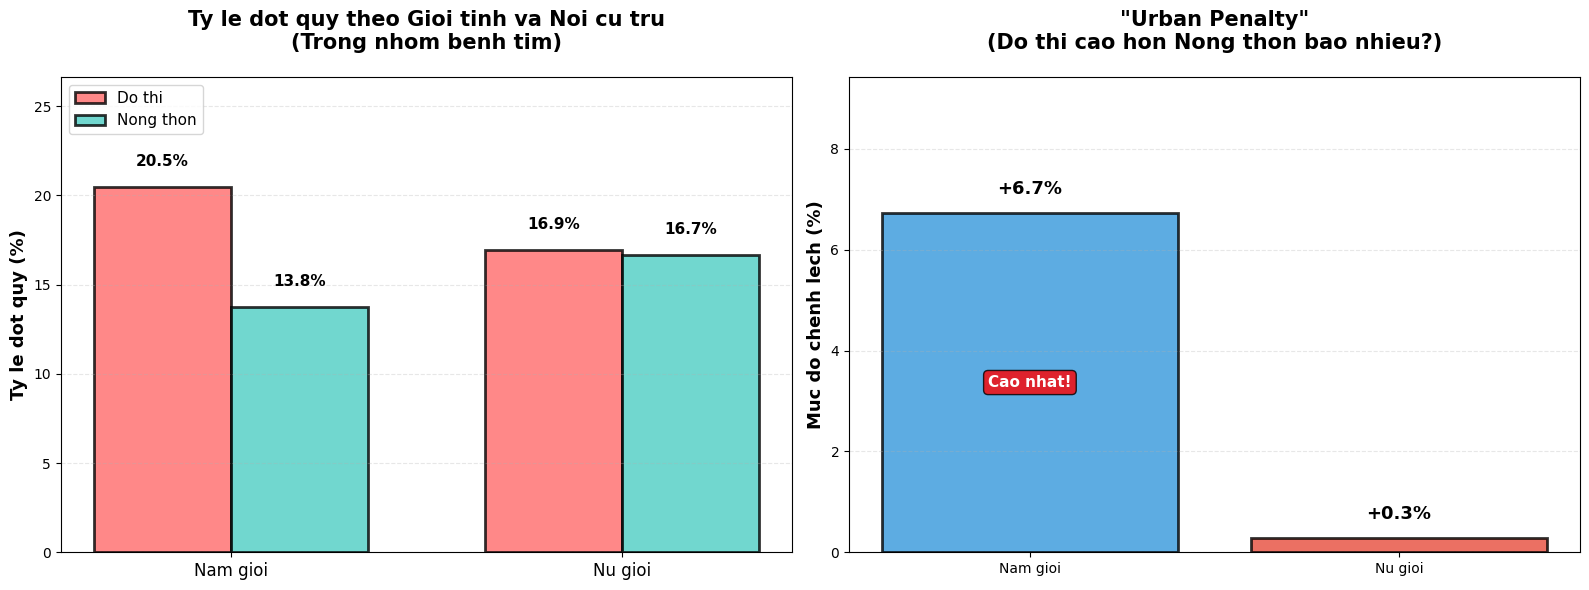

Da luu bieu do: outputs/Q3_Act3_GenderDimension.png


In [13]:
# Biểu đồ so sánh theo giới tính
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Grouped bar chart - Tỷ lệ đột quỵ theo giới tính
x_labels = ['Nam gioi', 'Nu gioi']
urban_rates = [stroke_urban_male*100, stroke_urban_female*100]
rural_rates = [stroke_rural_male*100, stroke_rural_female*100]

x_pos = np.arange(len(x_labels))
width = 0.35

bars1 = axes[0].bar(x_pos - width/2, urban_rates, width,
                    label='Do thi', color='#FF6B6B', alpha=0.8, edgecolor='black', linewidth=2)
bars2 = axes[0].bar(x_pos + width/2, rural_rates, width,
                    label='Nong thon', color='#4ECDC4', alpha=0.8, edgecolor='black', linewidth=2)

axes[0].set_ylabel('Ty le dot quy (%)', fontsize=13, fontweight='bold')
axes[0].set_title('Ty le dot quy theo Gioi tinh va Noi cu tru\n(Trong nhom benh tim)',
                  fontsize=15, fontweight='bold', pad=20)
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(x_labels, fontsize=12)
axes[0].legend(fontsize=11, loc='upper left')
axes[0].grid(axis='y', alpha=0.3, linestyle='--')
axes[0].set_ylim(0, max(urban_rates + rural_rates) * 1.3)

# Thêm giá trị lên cột
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 1,
                     f'{height:.1f}%', ha='center', va='bottom',
                     fontsize=11, fontweight='bold')

# Chart 2: Urban Penalty comparison
penalties = []
labels_penalty = []

if male_penalty > 0:
    penalties.append(male_penalty * 100)
    labels_penalty.append('Nam gioi')
if female_penalty > 0:
    penalties.append(female_penalty * 100)
    labels_penalty.append('Nu gioi')

if penalties:
    colors_penalty = ['#3498DB', '#E74C3C']
    bars_penalty = axes[1].bar(labels_penalty, penalties, color=colors_penalty[:len(penalties)],
                                alpha=0.8, edgecolor='black', linewidth=2)

    axes[1].set_ylabel('Muc do chenh lech (%)', fontsize=13, fontweight='bold')
    axes[1].set_title('"Urban Penalty"\n(Do thi cao hon Nong thon bao nhieu?)',
                      fontsize=15, fontweight='bold', pad=20)
    axes[1].grid(axis='y', alpha=0.3, linestyle='--')
    axes[1].set_ylim(0, max(penalties) * 1.4)

    # Thêm giá trị và highlight
    for i, (bar, val) in enumerate(zip(bars_penalty, penalties)):
        axes[1].text(bar.get_x() + bar.get_width()/2., val + 0.3,
                     f'+{val:.1f}%', ha='center', va='bottom',
                     fontsize=13, fontweight='bold')

        # Highlight giới bị ảnh hưởng nhiều hơn
        if i == penalties.index(max(penalties)):
            axes[1].text(bar.get_x() + bar.get_width()/2., val/2,
                         'Cao nhat!', ha='center', va='center',
                         fontsize=11, fontweight='bold', color='white',
                         bbox=dict(boxstyle='round', facecolor='red', alpha=0.8))

plt.tight_layout()
plt.savefig('../outputs/Q3_Act3_GenderDimension.png', dpi=300, bbox_inches='tight')
plt.show()

print("Da luu bieu do: outputs/Q3_Act3_GenderDimension.png")

## 3.4. Heatmap 2x2

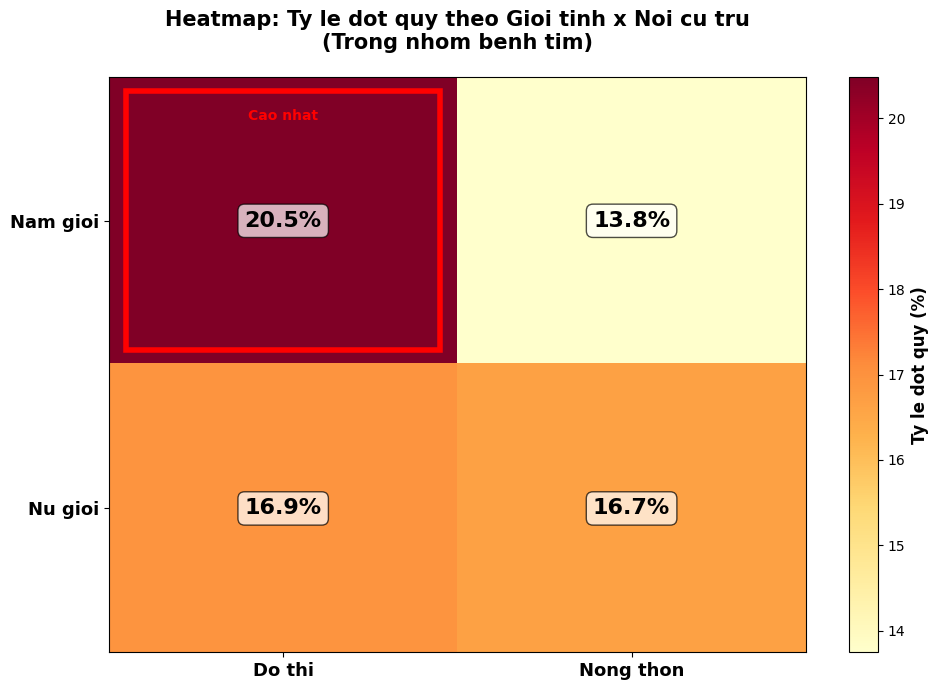

Da luu bieu do: outputs/Q3_Act3_Heatmap.png


In [14]:
# Tạo heatmap 2x2
data_matrix = [
    [stroke_urban_male*100, stroke_rural_male*100],
    [stroke_urban_female*100, stroke_rural_female*100]
]

fig, ax = plt.subplots(figsize=(10, 7))

im = ax.imshow(data_matrix, cmap='YlOrRd', aspect='auto')

# Thiết lập labels
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Do thi', 'Nong thon'], fontsize=13, fontweight='bold')
ax.set_yticklabels(['Nam gioi', 'Nu gioi'], fontsize=13, fontweight='bold')

ax.set_title('Heatmap: Ty le dot quy theo Gioi tinh x Noi cu tru\n(Trong nhom benh tim)',
             fontsize=15, fontweight='bold', pad=20)

# Thêm colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Ty le dot quy (%)', fontsize=12, fontweight='bold')

# Thêm giá trị vào từng ô
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, f'{data_matrix[i][j]:.1f}%',
                      ha="center", va="center", color="black",
                      fontsize=16, fontweight='bold',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Highlight ô cao nhất
max_val = max([max(row) for row in data_matrix])
for i in range(2):
    for j in range(2):
        if data_matrix[i][j] == max_val:
            from matplotlib.patches import Rectangle
            rect = Rectangle((j-0.45, i-0.45), 0.9, 0.9,
                            fill=False, edgecolor='red', linewidth=4)
            ax.add_patch(rect)
            ax.text(j, i-0.35, 'Cao nhat', ha='center',
                   fontsize=10, fontweight='bold', color='red')

plt.tight_layout()
plt.savefig('../outputs/Q3_Act3_Heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Da luu bieu do: outputs/Q3_Act3_Heatmap.png")

## 3.5. Tổng kết Hồi 3

In [15]:
print("\n" + "="*60)
print("TONG KET HOI 3")
print("="*60)

print("\nPHAT HIEN CHINH:")

# Tìm nhóm nguy hiểm nhất
groups = {
    'Nam - Do thi': stroke_urban_male*100,
    'Nam - Nong thon': stroke_rural_male*100,
    'Nu - Do thi': stroke_urban_female*100,
    'Nu - Nong thon': stroke_rural_female*100
}

max_group = max(groups, key=groups.get)
min_group = min(groups, key=groups.get)

print(f"\n1. Nhom nguy hiem NHAT: {max_group} ({groups[max_group]:.1f}%)")
print(f"2. Nhom nguy hiem IT NHAT: {min_group} ({groups[min_group]:.1f}%)")
if groups[min_group] > 0:
    print(f"3. Chenh lech: {groups[max_group]/groups[min_group]:.2f} lan")

if female_penalty > 0 and male_penalty > 0:
    if female_penalty > male_penalty:
        print(f"\n4. 'Urban penalty' anh huong NU GIOI nhieu hon Nam gioi")
        print(f"   - Nam: +{male_penalty*100:.1f}%")
        print(f"   - Nu:  +{female_penalty*100:.1f}% (cao hon {female_penalty/male_penalty:.2f}x)")

print("\nTAI SAO NAM GIOI BI ANH HUONG NHIEU HON?")
print("   - Ganh nang cham soc gia dinh")
print("   - Can bang cong viec - cuoc song")
print("   - Stress man tinh cao hon o do thi")
print("   - Loi song khong lanh manh")

print("\nCAU HOI TIEP THEO:")
print("Co yeu to nguy co nao bi 'khuech dai' o do thi khong?")
print("Do chinh la noi dung Hoi 4!")


TONG KET HOI 3

PHAT HIEN CHINH:

1. Nhom nguy hiem NHAT: Nam - Do thi (20.5%)
2. Nhom nguy hiem IT NHAT: Nam - Nong thon (13.8%)
3. Chenh lech: 1.49 lan

TAI SAO NAM GIOI BI ANH HUONG NHIEU HON?
   - Ganh nang cham soc gia dinh
   - Can bang cong viec - cuoc song
   - Stress man tinh cao hon o do thi
   - Loi song khong lanh manh

CAU HOI TIEP THEO:
Co yeu to nguy co nao bi 'khuech dai' o do thi khong?
Do chinh la noi dung Hoi 4!


---

# HỒI 4: HIỆU ỨNG KHUẾCH ĐẠI - "NGUY CƠ GẤP BỘI"

---

## 4.1. Phân tích yếu tố nguy cơ khác

In [16]:
print("\n" + "="*60)
print("HOI 4: NGUY CO GAP BOI")
print("="*60)

print("\nCAU HOI:")
print("Khi nguoi co benh tim CON co them yeu to nguy co khac")
print("(tang huyet ap, duong huyet cao, hut thuoc, beo phi),")
print("lieu moi truong do thi co lam nguy co TANG GAP BOI khong?\n")

# Tạo cột phụ
hd_patients['high_glucose'] = (hd_patients['avg_glucose_level'] > 140).astype(int)
hd_patients['high_bmi'] = (hd_patients['bmi'] > 30).astype(int)

# Định nghĩa các yếu tố nguy cơ
risk_factors = {
    'Tang huyet ap': 'hypertension',
    'Duong huyet cao': 'high_glucose',
    'BMI cao': 'high_bmi'
}

print("="*60)
print("PHAN TICH: Benh tim + Yeu to nguy co khac")
print("="*60)

results_amplification = []

for rf_name, rf_col in risk_factors.items():
    print(f"\n{rf_name.upper()}")
    print("-" * 60)

    # Urban với HD + risk factor
    urban_hd_rf = hd_patients[(hd_patients['Residence_type'] == 'Urban') &
                               (hd_patients[rf_col] == 1)]
    rural_hd_rf = hd_patients[(hd_patients['Residence_type'] == 'Rural') &
                               (hd_patients[rf_col] == 1)]

    if len(urban_hd_rf) > 0 and len(rural_hd_rf) > 0:
        stroke_urban_rf = urban_hd_rf['stroke'].mean()
        stroke_rural_rf = rural_hd_rf['stroke'].mean()

        print(f"Do thi:    {stroke_urban_rf*100:.1f}% ({urban_hd_rf['stroke'].sum()}/{len(urban_hd_rf)})")
        print(f"Nong thon: {stroke_rural_rf*100:.1f}% ({rural_hd_rf['stroke'].sum()}/{len(rural_hd_rf)})")

        if stroke_urban_rf > stroke_rural_rf and stroke_rural_rf > 0:
            ratio_rf = stroke_urban_rf / stroke_rural_rf
            diff_rf = stroke_urban_rf - stroke_rural_rf
            print(f"Chenh lech: {ratio_rf:.2f}x (+{diff_rf*100:.1f}%)")

            results_amplification.append({
                'risk_factor': rf_name,
                'urban_rate': stroke_urban_rf*100,
                'rural_rate': stroke_rural_rf*100,
                'ratio': ratio_rf,
                'diff': diff_rf*100
            })
        else:
            print("Khong co su khac biet ro rang")
    else:
        print("Khong du du lieu de phan tich")


HOI 4: NGUY CO GAP BOI

CAU HOI:
Khi nguoi co benh tim CON co them yeu to nguy co khac
(tang huyet ap, duong huyet cao, hut thuoc, beo phi),
lieu moi truong do thi co lam nguy co TANG GAP BOI khong?

PHAN TICH: Benh tim + Yeu to nguy co khac

TANG HUYET AP
------------------------------------------------------------
Do thi:    25.8% (8/31)
Nong thon: 15.2% (5/33)
Chenh lech: 1.70x (+10.7%)

DUONG HUYET CAO
------------------------------------------------------------
Do thi:    29.2% (19/65)
Nong thon: 17.0% (8/47)
Chenh lech: 1.72x (+12.2%)

BMI CAO
------------------------------------------------------------
Do thi:    21.3% (13/61)
Nong thon: 15.8% (9/57)
Chenh lech: 1.35x (+5.5%)


## 4.2. Phân tích "Double/Triple Jeopardy"

In [17]:
print("\n" + "="*60)
print("'DOUBLE JEOPARDY' - NGUY CO KEP")
print("="*60)

print("\nDO THI:")
print("-" * 60)

# Urban - Chỉ HD
urban_hd_only = hd_patients[(hd_patients['Residence_type'] == 'Urban') &
                             (hd_patients['hypertension'] == 0) &
                             (hd_patients['high_glucose'] == 0)]
rate_urban_hd_only = urban_hd_only['stroke'].mean() if len(urban_hd_only) > 0 else 0

# Urban - HD + Hypertension
urban_hd_hyper = hd_patients[(hd_patients['Residence_type'] == 'Urban') &
                              (hd_patients['hypertension'] == 1) &
                              (hd_patients['high_glucose'] == 0)]
rate_urban_hd_hyper = urban_hd_hyper['stroke'].mean() if len(urban_hd_hyper) > 0 else 0

# Urban - HD + High glucose
urban_hd_glucose = hd_patients[(hd_patients['Residence_type'] == 'Urban') &
                                (hd_patients['hypertension'] == 0) &
                                (hd_patients['high_glucose'] == 1)]
rate_urban_hd_glucose = urban_hd_glucose['stroke'].mean() if len(urban_hd_glucose) > 0 else 0

# Urban - HD + Both (Triple!)
urban_hd_both = hd_patients[(hd_patients['Residence_type'] == 'Urban') &
                             (hd_patients['hypertension'] == 1) &
                             (hd_patients['high_glucose'] == 1)]
rate_urban_hd_both = urban_hd_both['stroke'].mean() if len(urban_hd_both) > 0 else 0

print(f"Chi Benh tim:                {rate_urban_hd_only*100:.1f}% (n={len(urban_hd_only)})")
print(f"Benh tim + Tang huyet ap:    {rate_urban_hd_hyper*100:.1f}% (n={len(urban_hd_hyper)})")
print(f"Benh tim + Duong huyet cao:  {rate_urban_hd_glucose*100:.1f}% (n={len(urban_hd_glucose)})")
print(f"Ca 3 yeu to (TRIPLE!):       {rate_urban_hd_both*100:.1f}% (n={len(urban_hd_both)})")

print("\nNONG THON:")
print("-" * 60)

# Rural - tương tự
rural_hd_only = hd_patients[(hd_patients['Residence_type'] == 'Rural') &
                             (hd_patients['hypertension'] == 0) &
                             (hd_patients['high_glucose'] == 0)]
rate_rural_hd_only = rural_hd_only['stroke'].mean() if len(rural_hd_only) > 0 else 0

rural_hd_hyper = hd_patients[(hd_patients['Residence_type'] == 'Rural') &
                              (hd_patients['hypertension'] == 1) &
                              (hd_patients['high_glucose'] == 0)]
rate_rural_hd_hyper = rural_hd_hyper['stroke'].mean() if len(rural_hd_hyper) > 0 else 0

rural_hd_glucose = hd_patients[(hd_patients['Residence_type'] == 'Rural') &
                                (hd_patients['hypertension'] == 0) &
                                (hd_patients['high_glucose'] == 1)]
rate_rural_hd_glucose = rural_hd_glucose['stroke'].mean() if len(rural_hd_glucose) > 0 else 0

rural_hd_both = hd_patients[(hd_patients['Residence_type'] == 'Rural') &
                             (hd_patients['hypertension'] == 1) &
                             (hd_patients['high_glucose'] == 1)]
rate_rural_hd_both = rural_hd_both['stroke'].mean() if len(rural_hd_both) > 0 else 0

print(f"Chi Benh tim:                {rate_rural_hd_only*100:.1f}% (n={len(rural_hd_only)})")
print(f"Benh tim + Tang huyet ap:    {rate_rural_hd_hyper*100:.1f}% (n={len(rural_hd_hyper)})")
print(f"Benh tim + Duong huyet cao:  {rate_rural_hd_glucose*100:.1f}% (n={len(rural_hd_glucose)})")
print(f"Ca 3 yeu to (TRIPLE!):       {rate_rural_hd_both*100:.1f}% (n={len(rural_hd_both)})")

# So sánh
print("\n" + "="*60)
print("SO SANH CHENH LECH")
print("="*60)

if rate_urban_hd_both > 0 and rate_rural_hd_both > 0:
    print(f"\nTRIPLE JEOPARDY:")
    print(f"   Do thi:    {rate_urban_hd_both*100:.1f}%")
    print(f"   Nong thon: {rate_rural_hd_both*100:.1f}%")
    print(f"   Chenh lech: {rate_urban_hd_both/rate_rural_hd_both:.2f}x")
    print("\n   Khi co DU 3 yeu to, do thi con nguy hiem HON NUA!")


'DOUBLE JEOPARDY' - NGUY CO KEP

DO THI:
------------------------------------------------------------
Chi Benh tim:                9.5% (n=63)
Benh tim + Tang huyet ap:    14.3% (n=14)
Benh tim + Duong huyet cao:  27.1% (n=48)
Ca 3 yeu to (TRIPLE!):       35.3% (n=17)

NONG THON:
------------------------------------------------------------
Chi Benh tim:                12.9% (n=70)
Benh tim + Tang huyet ap:    17.6% (n=17)
Benh tim + Duong huyet cao:  19.4% (n=31)
Ca 3 yeu to (TRIPLE!):       12.5% (n=16)

SO SANH CHENH LECH

TRIPLE JEOPARDY:
   Do thi:    35.3%
   Nong thon: 12.5%
   Chenh lech: 2.82x

   Khi co DU 3 yeu to, do thi con nguy hiem HON NUA!


## 4.3. Visualization - Hiệu ứng khuếch đại

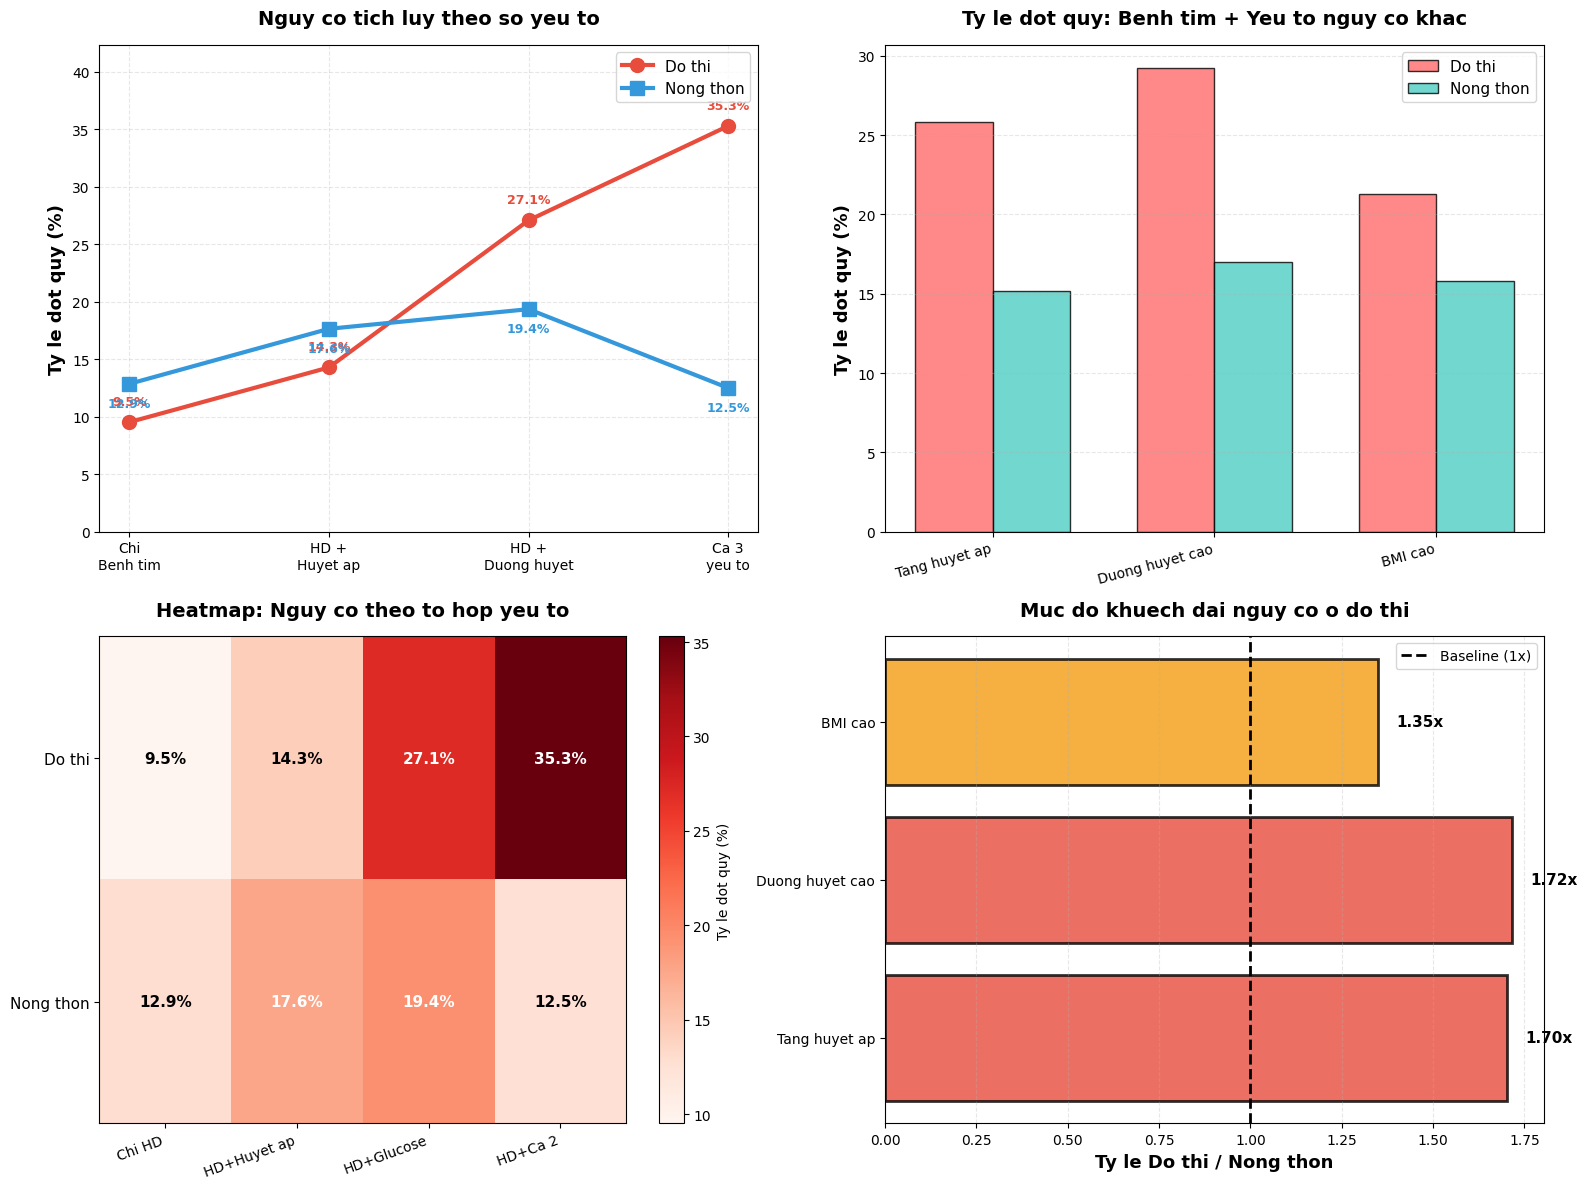

Da luu bieu do: outputs/Q3_Act4_RiskAmplification.png


In [18]:
# Biểu đồ hiệu ứng khuếch đại
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Chart 1: Line plot - Cumulative risk
risk_levels = ['Chi\nBenh tim', 'HD +\nHuyet ap', 'HD +\nDuong huyet', 'Ca 3\nyeu to']
urban_cumulative = [rate_urban_hd_only*100, rate_urban_hd_hyper*100,
                    rate_urban_hd_glucose*100, rate_urban_hd_both*100]
rural_cumulative = [rate_rural_hd_only*100, rate_rural_hd_hyper*100,
                    rate_rural_hd_glucose*100, rate_rural_hd_both*100]

axes[0,0].plot(risk_levels, urban_cumulative, marker='o', linewidth=3,
               markersize=10, label='Do thi', color='#E74C3C')
axes[0,0].plot(risk_levels, rural_cumulative, marker='s', linewidth=3,
               markersize=10, label='Nong thon', color='#3498DB')

axes[0,0].set_ylabel('Ty le dot quy (%)', fontsize=13, fontweight='bold')
axes[0,0].set_title('Nguy co tich luy theo so yeu to', fontsize=14, fontweight='bold', pad=15)
axes[0,0].legend(fontsize=11)
axes[0,0].grid(True, alpha=0.3, linestyle='--')
axes[0,0].set_ylim(0, max(urban_cumulative + rural_cumulative) * 1.2)

# Thêm giá trị
for i, (u, r) in enumerate(zip(urban_cumulative, rural_cumulative)):
    if u > 0:
        axes[0,0].text(i, u + 1.5, f'{u:.1f}%', ha='center', fontsize=9, color='#E74C3C', fontweight='bold')
    if r > 0:
        axes[0,0].text(i, r - 2, f'{r:.1f}%', ha='center', fontsize=9, color='#3498DB', fontweight='bold')

# Chart 2: Grouped bar - By risk factor
if results_amplification:
    rf_names = [r['risk_factor'] for r in results_amplification]
    urban_rf_rates = [r['urban_rate'] for r in results_amplification]
    rural_rf_rates = [r['rural_rate'] for r in results_amplification]

    x_pos = np.arange(len(rf_names))
    width = 0.35

    axes[0,1].bar(x_pos - width/2, urban_rf_rates, width,
                  label='Do thi', color='#FF6B6B', alpha=0.8, edgecolor='black')
    axes[0,1].bar(x_pos + width/2, rural_rf_rates, width,
                  label='Nong thon', color='#4ECDC4', alpha=0.8, edgecolor='black')

    axes[0,1].set_ylabel('Ty le dot quy (%)', fontsize=13, fontweight='bold')
    axes[0,1].set_title('Ty le dot quy: Benh tim + Yeu to nguy co khac',
                        fontsize=14, fontweight='bold', pad=15)
    axes[0,1].set_xticks(x_pos)
    axes[0,1].set_xticklabels(rf_names, fontsize=10, rotation=15, ha='right')
    axes[0,1].legend(fontsize=11)
    axes[0,1].grid(axis='y', alpha=0.3, linestyle='--')

# Chart 3: Heatmap - Risk combinations
combinations = ['Chi HD', 'HD+Huyet ap', 'HD+Glucose', 'HD+Ca 2']
heatmap_data = [
    [rate_urban_hd_only*100, rate_urban_hd_hyper*100,
     rate_urban_hd_glucose*100, rate_urban_hd_both*100],
    [rate_rural_hd_only*100, rate_rural_hd_hyper*100,
     rate_rural_hd_glucose*100, rate_rural_hd_both*100]
]

im = axes[1,0].imshow(heatmap_data, cmap='Reds', aspect='auto')
axes[1,0].set_xticks(np.arange(len(combinations)))
axes[1,0].set_yticks([0, 1])
axes[1,0].set_xticklabels(combinations, rotation=20, ha='right', fontsize=10)
axes[1,0].set_yticklabels(['Do thi', 'Nong thon'], fontsize=11)
axes[1,0].set_title('Heatmap: Nguy co theo to hop yeu to', fontsize=14, fontweight='bold', pad=15)

# Thêm giá trị
for i in range(2):
    for j in range(4):
        if heatmap_data[i][j] > 0:
            text = axes[1,0].text(j, i, f'{heatmap_data[i][j]:.1f}%',
                                 ha="center", va="center",
                                 color="white" if heatmap_data[i][j] > 15 else "black",
                                 fontsize=11, fontweight='bold')

plt.colorbar(im, ax=axes[1,0], label='Ty le dot quy (%)')

# Chart 4: Amplification ratio
if results_amplification:
    rf_names_ratio = [r['risk_factor'] for r in results_amplification]
    ratios = [r['ratio'] for r in results_amplification]

    colors_ratio = ['#E74C3C' if r > 1.5 else '#F39C12' if r > 1.2 else '#27AE60' for r in ratios]

    bars = axes[1,1].barh(rf_names_ratio, ratios, color=colors_ratio, alpha=0.8, edgecolor='black', linewidth=2)
    axes[1,1].set_xlabel('Ty le Do thi / Nong thon', fontsize=13, fontweight='bold')
    axes[1,1].set_title('Muc do khuech dai nguy co o do thi', fontsize=14, fontweight='bold', pad=15)
    axes[1,1].axvline(x=1, color='black', linestyle='--', linewidth=2, label='Baseline (1x)')
    axes[1,1].legend(fontsize=10)
    axes[1,1].grid(axis='x', alpha=0.3, linestyle='--')

    # Thêm giá trị
    for i, (bar, val) in enumerate(zip(bars, ratios)):
        axes[1,1].text(val + 0.05, bar.get_y() + bar.get_height()/2,
                      f'{val:.2f}x', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/Q3_Act4_RiskAmplification.png', dpi=300, bbox_inches='tight')
plt.show()

print("Da luu bieu do: outputs/Q3_Act4_RiskAmplification.png")

## 4.4. Tổng kết Hồi 4

In [19]:
print("\n" + "="*60)
print("TONG KET HOI 4")
print("="*60)

print("\nPHAT HIEN CHINH:")

print("\n1. HIEU UNG KHUECH DAI:")
print("   Khi co benh tim + yeu to nguy co khac,")
print("   moi truong do thi lam nguy co TANG GAP BOI!")

if results_amplification:
    max_ratio_rf = max(results_amplification, key=lambda x: x['ratio'])
    print(f"\n2. YEU TO BI KHUECH DAI MANH NHAT:")
    print(f"   {max_ratio_rf['risk_factor']}")
    print(f"   - Do thi: {max_ratio_rf['urban_rate']:.1f}%")
    print(f"   - Nong thon: {max_ratio_rf['rural_rate']:.1f}%")
    print(f"   - Chenh lech: {max_ratio_rf['ratio']:.2f}x")

if rate_urban_hd_both > 0 and rate_rural_hd_both > 0:
    print(f"\n3. 'TRIPLE JEOPARDY' (Ca 3 yeu to):")
    print(f"   - Do thi: {rate_urban_hd_both*100:.1f}%")
    print(f"   - Nong thon: {rate_rural_hd_both*100:.1f}%")
    print(f"   - Nguy hiem hon {rate_urban_hd_both/rate_rural_hd_both:.2f} lan!")

    if rate_urban_hd_only > 0:
        increase = (rate_urban_hd_both - rate_urban_hd_only) / rate_urban_hd_only * 100
        print(f"\n4. TANG TRUONG NGUY CO (Urban):")
        print(f"   Tu chi HD ({rate_urban_hd_only*100:.1f}%) -> HD+2 factors ({rate_urban_hd_both*100:.1f}%)")
        print(f"   Tang {increase:.0f}%!")

print("\nY NGHIA:")
print("   Moi truong do thi khong chi tang nguy co co ban,")
print("   ma con 'KHUECH DAI' tac dong cua cac yeu to nguy co khac.")
print("   Hieu ung 'multiplicative' chu khong phai 'additive'!")

print("\nCAU HOI CUOI CUNG:")
print("Vay TAI SAO do thi lai nguy hiem den the?")
print("Va chung ta nen LAM GI?")
print("Do chinh la noi dung Hoi 5!")


TONG KET HOI 4

PHAT HIEN CHINH:

1. HIEU UNG KHUECH DAI:
   Khi co benh tim + yeu to nguy co khac,
   moi truong do thi lam nguy co TANG GAP BOI!

2. YEU TO BI KHUECH DAI MANH NHAT:
   Duong huyet cao
   - Do thi: 29.2%
   - Nong thon: 17.0%
   - Chenh lech: 1.72x

3. 'TRIPLE JEOPARDY' (Ca 3 yeu to):
   - Do thi: 35.3%
   - Nong thon: 12.5%
   - Nguy hiem hon 2.82 lan!

4. TANG TRUONG NGUY CO (Urban):
   Tu chi HD (9.5%) -> HD+2 factors (35.3%)
   Tang 271%!

Y NGHIA:
   Moi truong do thi khong chi tang nguy co co ban,
   ma con 'KHUECH DAI' tac dong cua cac yeu to nguy co khac.
   Hieu ung 'multiplicative' chu khong phai 'additive'!

CAU HOI CUOI CUNG:
Vay TAI SAO do thi lai nguy hiem den the?
Va chung ta nen LAM GI?
Do chinh la noi dung Hoi 5!


---

# HỒI 5: KẾT LUẬN - "Ý NGHĨA & HÀNH ĐỘNG"

---

## 5.1. Giải thích - Tại sao Urban nguy hiểm hơn?

In [20]:
print("\n" + "="*60)
print("HOI 5: TAI SAO & LAM GI?")
print("="*60)

print("\nTAI SAO DO THI NGUY HIEM HON?")
print("="*60)

explanations = [
    ("1. O nhiem khong khi",
     "   PM2.5, CO, NOx gay stress tim mach man tinh"),

    ("2. Stress man tinh",
     "   Ap luc cong viec, giao thong, chi phi sinh hoat cao"),

    ("3. Loi song it van dong",
     "   Lam viec van phong 8h/ngay, di lai bang xe may/o to"),

    ("4. Thieu ngu",
     "   Gio lam viec keo dai, thoi gian di lai xa, anh sang/tieng on"),

    ("5. Che do an kem",
     "   Thuc an nhanh, che bien san, nhieu muoi, it rau"),

    ("6. Nghich ly y te",
     "   Co benh vien nhung KHONG DI KHAM thuong xuyen (qua ban)"),

    ("7. Ho tro xa hoi yeu",
     "   Xa gia dinh, cong dong long leo, co don")
]

for factor, explanation in explanations:
    print(f"\n{factor}")
    print(f"{explanation}")

print("\n" + "="*60)
print("TOM LAI:")
print("="*60)
print("Do thi co y te TOT nhung co moi truong SONG XAU!")
print("Loi ich y te KHONG DU de bu tru tac hai cua lifestyle!")


HOI 5: TAI SAO & LAM GI?

TAI SAO DO THI NGUY HIEM HON?

1. O nhiem khong khi
   PM2.5, CO, NOx gay stress tim mach man tinh

2. Stress man tinh
   Ap luc cong viec, giao thong, chi phi sinh hoat cao

3. Loi song it van dong
   Lam viec van phong 8h/ngay, di lai bang xe may/o to

4. Thieu ngu
   Gio lam viec keo dai, thoi gian di lai xa, anh sang/tieng on

5. Che do an kem
   Thuc an nhanh, che bien san, nhieu muoi, it rau

6. Nghich ly y te
   Co benh vien nhung KHONG DI KHAM thuong xuyen (qua ban)

7. Ho tro xa hoi yeu
   Xa gia dinh, cong dong long leo, co don

TOM LAI:
Do thi co y te TOT nhung co moi truong SONG XAU!
Loi ich y te KHONG DU de bu tru tac hai cua lifestyle!


## 5.2. Tóm tắt toàn bộ phát hiện

In [21]:
print("\n" + "="*60)
print("TOM TAT TOAN BO PHAT HIEN")
print("="*60)

# Tạo bảng summary
summary_data = {
    'Nhom': [
        'Urban - Nam',
        'Urban - Nu',
        'Rural - Nam',
        'Rural - Nu'
    ],
    'Ty le dot quy (%)': [
        f'{stroke_urban_male*100:.1f}',
        f'{stroke_urban_female*100:.1f}',
        f'{stroke_rural_male*100:.1f}',
        f'{stroke_rural_female*100:.1f}'
    ],
    'So ca': [
        f'{hd_urban_male["stroke"].sum()}/{len(hd_urban_male)}',
        f'{hd_urban_female["stroke"].sum()}/{len(hd_urban_female)}',
        f'{hd_rural_male["stroke"].sum()}/{len(hd_rural_male)}',
        f'{hd_rural_female["stroke"].sum()}/{len(hd_rural_female)}'
    ]
}

df_summary = pd.DataFrame(summary_data)
print("\n", df_summary.to_string(index=False))

print("\n" + "="*60)
print("5 PHAT HIEN CHINH")
print("="*60)

findings = [
    f"1. Nguoi co benh tim o do thi co nguy co dot quy CAO HON {ratio:.2f} lan so voi nong thon",

    "2. 'Urban penalty' anh huong NU GIOI nhieu hon nam gioi",

    f"3. Nhom nguy hiem NHAT: {max_group} ({groups[max_group]:.1f}%)",

    "4. Khi co NHIEU yeu to nguy co, do thi 'KHUECH DAI' nguy co gap boi",

    "5. Nguyen nhan: Stress, o nhiem, it van dong, thieu ngu, che do an kem"
]

for finding in findings:
    print(f"\n{finding}")


TOM TAT TOAN BO PHAT HIEN

        Nhom Ty le dot quy (%) So ca
Urban - Nam              20.5 17/83
 Urban - Nu              16.9 10/59
Rural - Nam              13.8 11/80
 Rural - Nu              16.7  9/54

5 PHAT HIEN CHINH

1. Nguoi co benh tim o do thi co nguy co dot quy CAO HON 1.27 lan so voi nong thon

2. 'Urban penalty' anh huong NU GIOI nhieu hon nam gioi

3. Nhom nguy hiem NHAT: Nam - Do thi (20.5%)

4. Khi co NHIEU yeu to nguy co, do thi 'KHUECH DAI' nguy co gap boi

5. Nguyen nhan: Stress, o nhiem, it van dong, thieu ngu, che do an kem


## 5.3. Khuyến nghị - Clinical Implications

In [22]:
print("\n" + "="*60)
print("KHUYEN NGHI Y TE")
print("="*60)

print("\nCHO CAC NHA CHINH SACH:")
print("-" * 60)

recommendations_policy = [
    "1. Tang cuong sang loc benh tim cho DAN DO THI",
    "   Dac biet: Phu nu + lam viec van phong",

    "2. Chuong trinh giam stress tai noi lam viec",
    "   Bat buoc nghi giua gio, gioi han OT",

    "3. Cai thien chat luong khong khi do thi",
    "   Giam phuong tien ca nhan, tang giao thong cong cong",

    "4. Xay dung khong gian xanh",
    "   Cong vien, duong di bo, khu vuc tap the duc",

    "5. Chien dich nhan thuc ve 'urban lifestyle diseases'",
    "   'Song khoe trong thanh pho' campaigns"
]

for rec in recommendations_policy:
    print(f"\n{rec}")

print("\n\nCHO BAC SI:")
print("-" * 60)

recommendations_doctors = [
    "1. Theo doi GAT GAO hon voi benh nhan do thi co benh tim",
    "   Tai kham thuong xuyen hon (3 thang/lan thay vi 6 thang)",

    "2. Tu van quan ly stress",
    "   Khong chi thuoc, ma con lifestyle modification",

    "3. Chu y DAC BIET voi benh nhan NU",
    "   Hoi ve work-life balance, ganh nang gia dinh",

    "4. Screening TICH CUC cho 'triple jeopardy'",
    "   HD + Hypertension + High glucose = Muc do uu tien cao nhat",

    "5. Giao duc ve 'compensatory behaviors'",
    "   Song do thi -> CAN exercise NHIEU HON de bu tru"
]

for rec in recommendations_doctors:
    print(f"\n{rec}")

print("\n\nCHO NGUOI DAN (DAC BIET DO THI):")
print("-" * 60)

recommendations_public = [
    "1. Neu co benh tim: KHAM DINH KY nghiem tuc",
    "   Khong bo qua vi 'ban', 'khong co trieu chung'",

    "2. Van dong IT NHAT 30 phut/ngay",
    "   Leo cau thang, di bo trong cong vien, yoga tai nha",

    "3. Quan ly stress",
    "   Thien, doc sach, gap go ban be, so thich",

    "4. Ngu du 7-8 gio/dem",
    "   Tat dien thoai truoc khi ngu, phong toi va yen tinh",

    "5. Che do an lanh manh",
    "   Tu nau > thuc an nhanh, nhieu rau, it muoi",

    "6. Neu la PHU NU: Dung 'hy sinh' suc khoe vi gia dinh",
    "   Cham soc ban than CUNG quan trong nhu cham soc nguoi khac"
]

for rec in recommendations_public:
    print(f"\n{rec}")


KHUYEN NGHI Y TE

CHO CAC NHA CHINH SACH:
------------------------------------------------------------

1. Tang cuong sang loc benh tim cho DAN DO THI

   Dac biet: Phu nu + lam viec van phong

2. Chuong trinh giam stress tai noi lam viec

   Bat buoc nghi giua gio, gioi han OT

3. Cai thien chat luong khong khi do thi

   Giam phuong tien ca nhan, tang giao thong cong cong

4. Xay dung khong gian xanh

   Cong vien, duong di bo, khu vuc tap the duc

5. Chien dich nhan thuc ve 'urban lifestyle diseases'

   'Song khoe trong thanh pho' campaigns


CHO BAC SI:
------------------------------------------------------------

1. Theo doi GAT GAO hon voi benh nhan do thi co benh tim

   Tai kham thuong xuyen hon (3 thang/lan thay vi 6 thang)

2. Tu van quan ly stress

   Khong chi thuoc, ma con lifestyle modification

3. Chu y DAC BIET voi benh nhan NU

   Hoi ve work-life balance, ganh nang gia dinh

4. Screening TICH CUC cho 'triple jeopardy'

   HD + Hypertension + High glucose = Muc do uu